In [1]:
from PIL import Image, ImageFile
from IPython.display import display
import ipywidgets as widgets
import os
import shutil
import glob
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout,Flatten,BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=15,
    width_shift_range=0.20,
    height_shift_range=0.10,
)
batch_sizee = 32
img_width = 64
img_height = 64


In [3]:
train_data = datagen.flow_from_directory(
    'A:\Kuliah\Skrpsi\Program\Image\Train',
    target_size=(img_height, img_width),
    batch_size=batch_sizee,
    class_mode='binary',
    color_mode='grayscale',
    subset='training'
    )
validasi_data = datagen.flow_from_directory(
    'A:\Kuliah\Skrpsi\Program\Image\Train',
    target_size=(img_height, img_width),    
    batch_size=batch_sizee,
    class_mode='binary',
    subset='validation',
    color_mode='grayscale'
)

Found 14214 images belonging to 2 classes.
Found 2507 images belonging to 2 classes.


In [4]:
import cv2
import numpy as np
from skimage.feature import hog
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, Dropout, Dense, BatchNormalization, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping


# Model CNN
model = Sequential([
    Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    BatchNormalization(),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Ubah ke softmax jika 2 kelas
])


optimizer = Adam(learning_rate=0.001)
loss_function = 'binary_crossentropy' 
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


model.summary()


c:\Program Files\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 32, 32, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 16, 16, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,065,585 (4.06 MB)

 Trainable params: 1,065,393 (4.06 MB)

 Non-trainable params: 192 (768.00 B)

In [6]:
history = model.fit(
    train_data,
    validation_data=validasi_data,
    epochs=10
)


Epoch 1/10


c:\Program Files\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


445/445 ━━━━━━━━━━━━━━━━━━━━ 93s 201ms/step - accuracy: 0.8796 - loss: 0.3061 - val_accuracy: 0.7615 - val_loss: 0.7745
Epoch 2/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 106s 232ms/step - accuracy: 0.9704 - loss: 0.0799 - val_accuracy: 0.9777 - val_loss: 0.0725
Epoch 3/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 90s 199ms/step - accuracy: 0.9845 - loss: 0.0494 - val_accuracy: 0.9585 - val_loss: 0.1412
Epoch 4/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 86s 192ms/step - accuracy: 0.9864 - loss: 0.0409 - val_accuracy: 0.9777 - val_loss: 0.0757
Epoch 5/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 86s 191ms/step - accuracy: 0.9913 - loss: 0.0240 - val_accuracy: 0.9781 - val_loss: 0.0747
Epoch 6/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.9920 - loss: 0.0249 - val_accuracy: 0.9864 - val_loss: 0.0335
Epoch 7/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 90s 201ms/step - accuracy: 0.9948 - loss: 0.0178 - val_accuracy: 0.9769 - val_loss: 0.0808
Epoch 8/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 88s 195ms/step - accuracy: 0.9926 - loss: 0.0196 - va

In [ ]:
model.save(r"A:\Kuliah\Skrpsi\Program\model_cnn44.h5")



In [8]:
import tensorflow as tf

#model = tf.keras.models.load_model("model_FIX.h5")


In [9]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None  # Skip jika bukan gambar
    
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
    img = img / 255.0  # Normalisasi
    img = np.expand_dims(img, axis=-1)  # Tambah channel untuk grayscale (64, 64, 1)
    img = np.expand_dims(img, axis=0)  # Tambah batch dimension (1, 64, 64, 1)
    return img


# === 3. Load Semua Gambar Validasi Secara Manual ===
class_names = validasi_data.class_indices  # Ambil label otomatis dari data generator
class_names = {v: k for k, v in class_names.items()}  # Balikkan indeks ke nama kelas

y_true = []
y_pred = []

for image_path, label in zip(validasi_data.filepaths, validasi_data.labels):
    image = preprocess_image(image_path)  # Preprocess gambar
    if image is None:
        print(f"Gagal membaca gambar: {image_path}, dilewati.")
        continue
    
    prediction = model.predict(image, verbose=0)  # Prediksi model
    predicted_class = 1 if prediction[0][0] > 0.5 else 0  # Threshold 0.5 untuk sigmoid
    
    y_true.append(label)  # Label asli (0 atau 1)
    y_pred.append(predicted_class)  # Label prediksi (0 atau 1)

# === 4. Hitung Confusion Matrix ===
cm = confusion_matrix(np.array(y_true), np.array(y_pred))
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(np.array(y_true), np.array(y_pred))


Confusion Matrix:
 [[1395    7]
 [  24 1081]]


In [10]:
from sklearn.metrics import f1_score


# Menghitung F1 Score
f1 = f1_score(y_true, y_pred)

print("F1", f1) 


F1 0.9858641130870953


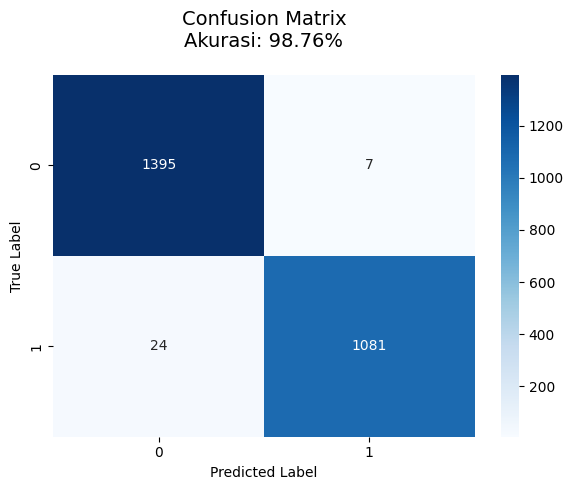

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                 xticklabels=class_names.keys(), 
                 yticklabels=class_names.keys())

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Judul dengan akurasi digabung
plt.title(f"Confusion Matrix\nAkurasi: {accuracy:.2%}", fontsize=14, pad=20)

plt.tight_layout()
plt.show()


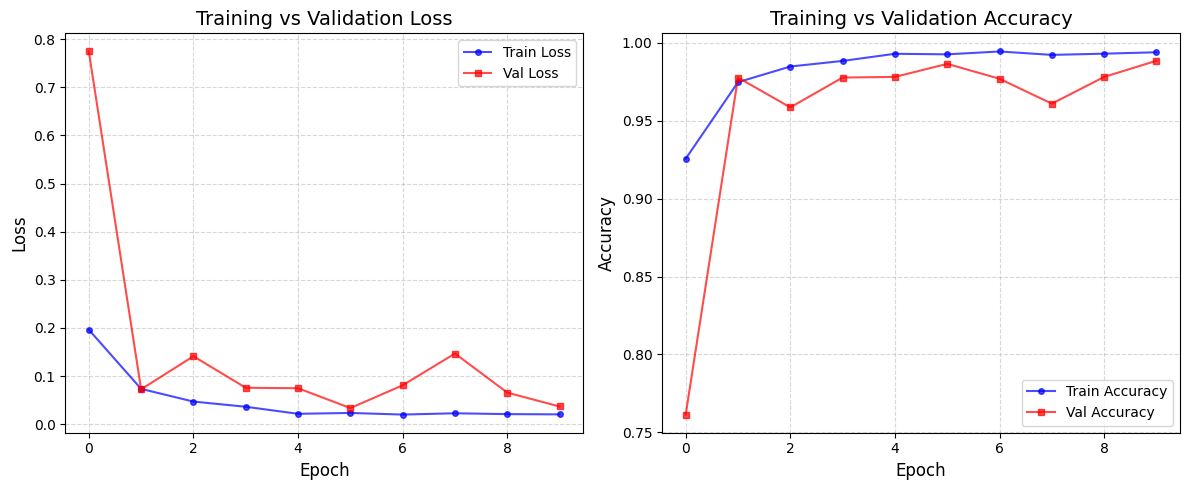

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Lebar 12 inci, tinggi 5 inci

# === Subplot 1: Loss ===
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot ke-1
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='o', markersize=4, linewidth=1.5, alpha=0.7)
plt.plot(history.history['val_loss'], label='Val Loss', color='red', marker='s', markersize=4, linewidth=1.5, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# === Subplot 2: Accuracy ===
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot ke-2
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', marker='o', markersize=4, linewidth=1.5, alpha=0.7)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red', marker='s', markersize=4, linewidth=1.5, alpha=0.7)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Mencegah tumpang tindih
plt.show()

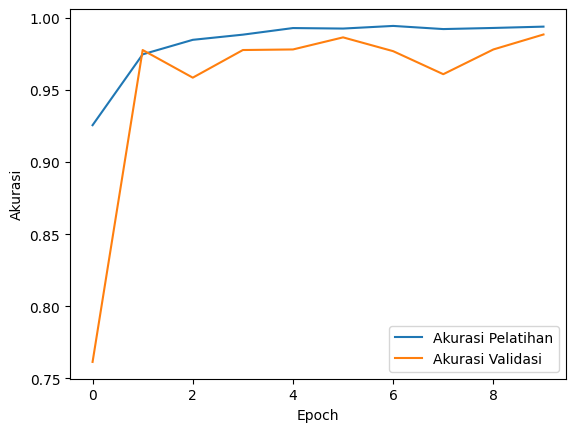

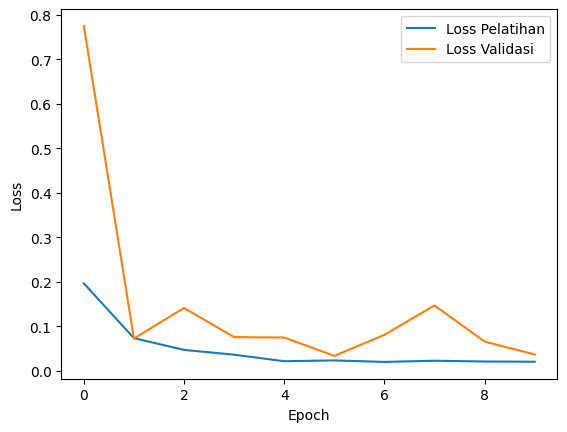

In [13]:
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
aa

NameError: name 'aa' is not defined

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model(r"A:\Kuliah\Skrpsi\Program\model_cnn4.h5")

In [ ]:
import cv2
import os

# Path folder gambar
folder_path = "A:/Kuliah/Lomba/Lomba Big Data/Test Data"

# Ambil daftar file dalam folder
file_list = os.listdir(folder_path)

# Loop untuk membaca setiap gambar
for file_name in file_list:
    if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter hanya gambar
        img_path = os.path.join(folder_path, file_name)  # Gabungkan path
        image = cv2.imread(img_path)  # Membaca gambar
        
        if image is not None:
            print(f"Berhasil membaca: {file_name}, ukuran: {image.shape}")
        else:
            print(f"Gagal membaca: {file_name}")


In [ ]:
import cv2
import os
import pandas as pd

# Path folder gambar
folder_path = r"A:\Kuliah\Skrpsi\Program\Image\Test"

# Ambil daftar file dalam folder
file_list = os.listdir(folder_path)

# List untuk menyimpan informasi gambar
data = []

# Loop untuk membaca setiap gambar
for file_name in file_list:
    if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter hanya gambar
        img_path = os.path.join(folder_path, file_name)  # Gabungkan path
        image = cv2.imread(img_path)  # Membaca gambar
        
        if image is not None: # Dapatkan ukuran gambar
            data.append([file_name,img_path])  # Simpan ke list

# Buat DataFrame pandas
df = pd.DataFrame(data, columns=["Nama File","path"])

# Simpan ke file Excel
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar.xlsx"
df.to_excel(excel_path, index=False)

print(f"Data berhasil disimpan ke {excel_path}")


Data berhasil disimpan ke A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar.xlsx


In [ ]:
import pandas as pd 

In [ ]:
data=pd.read_excel("A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar(gaboleh diubah).xlsx")
data_shuffled = data.sample(frac=1).reset_index(drop=True)

# Simpan kembali hasil yang sudah diacak ke Excel
data_shuffled.to_excel(r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx", index=False)

print("Data berhasil diacak dan disimpan!")

Data berhasil diacak dan disimpan!


In [ ]:
read= pd.read_excel("A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx")

In [ ]:
read

,Nama File,path,Actual,Predic
0,00630_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00630_face...,Human,NaN
1,person_1879.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_187...,AI FIX,NaN
2,person_1634.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_163...,AI FIX,NaN
3,00602_face_3.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00602_face...,Human,NaN
4,person_1695.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_169...,AI FIX,NaN
...,...,...,...,...
877,02508_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02508_face...,Human,NaN
878,person_1911.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_191...,AI FIX,NaN
879,00749_face_2.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00749_face...,Human,NaN
880,person_1809.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_180...,AI FIX,NaN


In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  # (64, 64, 1)
    img = np.expand_dims(img, axis=0)   # (1, 64, 64, 1)
    return img

# Membaca DataFrame
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df = pd.read_excel(excel_path)

# Cek nama kolom path
print("Kolom dalam DataFrame:", df.columns)
if "path" in df.columns:
    path_col = "path"
elif "Path" in df.columns:
    path_col = "Path"
else:
    raise ValueError("Kolom path tidak ditemukan dalam Excel!")

# Label kelas
class_labels = {0: "AI FIX", 1: "Human"}

predictions = []
threshold = 0.5

for idx, row in df.iterrows():
    image_path = row[path_col]
    image = preprocess_image(image_path)
    if image is None:
        print(f"Gagal membaca gambar: {image_path}, dilewati.")
        predictions.append("Error")
        continue

    pred = model.predict(image)  # bisa jadi shape (1,1) atau (1,2)
    # Tentukan probabilitas kelas positif (label 1)
    if pred.shape[-1] == 1:
        prob_pos = pred[0, 0]
    else:
        prob_pos = pred[0, 1]

    # Terapkan threshold
    if prob_pos >= threshold:
        predictions.append(class_labels[1])
    else:
        predictions.append(class_labels[0])

# Simpan hasil
df["Predic"] = predictions
output_path = excel_path  # atau path lain jika mau
df.to_excel(output_path, index=False)
print(f"Hasil prediksi telah disimpan ke {output_path}")


Kolom dalam DataFrame: Index(['Nama File', 'path', 'Actual', 'Predic'], dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Baca file Excel yang sudah ada prediksinya
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df = pd.read_excel(excel_path)


In [ ]:
df

,Nama File,path,Actual,Predic
0,00630_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00630_face...,Human,Human
1,person_1879.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_187...,AI FIX,AI FIX
2,person_1634.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_163...,AI FIX,AI FIX
3,00602_face_3.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00602_face...,Human,Human
4,person_1695.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_169...,AI FIX,AI FIX
...,...,...,...,...
877,02508_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02508_face...,Human,Human
878,person_1911.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_191...,AI FIX,AI FIX
879,00749_face_2.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00749_face...,Human,AI FIX
880,person_1809.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_180...,AI FIX,AI FIX


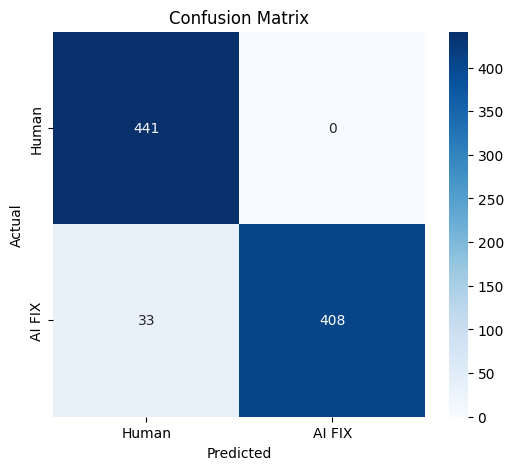

In [ ]:
actual = df["Actual"]
predicted = df["Predic"]

# Buat confusion matrix
cm = confusion_matrix(actual, predicted, labels=["AI FIX", "Human"])

# Buat heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Human", "AI FIX"], yticklabels=["Human", "AI FIX"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

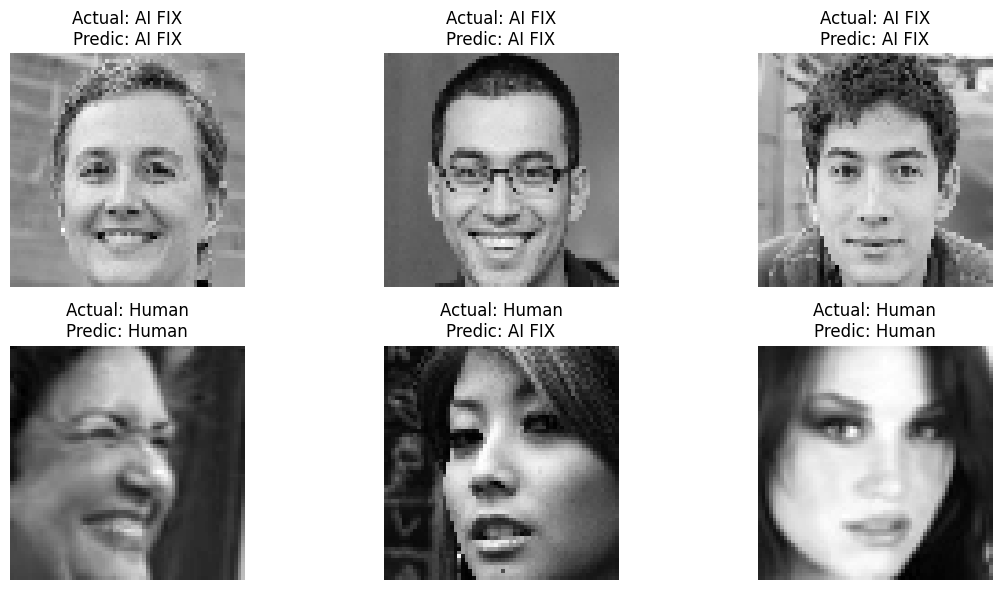

In [ ]:

# Acak data dan ambil 6 gambar pertama yang tidak error
df_filtered = df[df["Predic"] != "Error"].sample(frac=1).head(6)

# Buat plot gambar
plt.figure(figsize=(12, 6))

for i, row in enumerate(df_filtered.itertuples()):
    image_path = row.path  # Sesuaikan dengan nama kolom di Excel
    actual_label = row.Actual  # Label sebenarnya
    predicted_label = row.Predic  # Prediksi dari model

    # Baca dan proses gambar
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))  # Resize agar sesuai
    else:
        continue  # Jika gambar tidak valid, skip

    # Plot gambar
    plt.subplot(2, 3, i + 1)  # Grid 2x3
    plt.imshow(img, cmap="gray")
    plt.title(f"Actual: {actual_label}\nPredic: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
                                       Path Gambar  Prediksi  Akurasi
0  A:\Kuliah\Skrpsi\Program\Test\download (10).jpg         1    63.77
1  A:\Kuliah\Skrpsi\Program\Test\download (11).jpg         1    98.62
2  A:\Kuliah\Skrpsi\Program\Test\download (15).jpg         1    99.75
3  A:\Kuliah\Skrpsi\Program\Test\download (17).jpg         0     0.00
4  A:\Kuliah\Skrpsi\Program\Test\download (18).jpg         1   100.00
5   A:\Kuliah\Skrpsi\Program\Test\download (6).jpg         0     0.00
6   A:\Kuliah\Skrpsi\Program\Test\download (7).jpg         0     0.00
7   A:\Kuliah\Skrpsi\Program\Test\download (8).jpg         0     0.00
8   A:\Kuliah\Skrpsi\Program

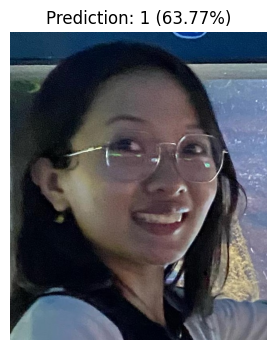

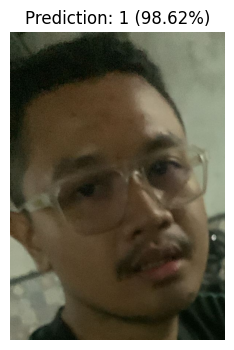

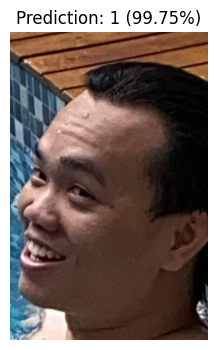

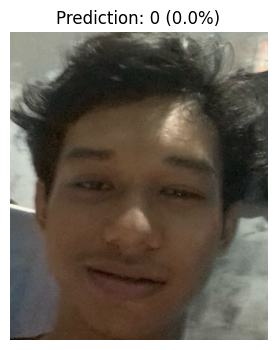

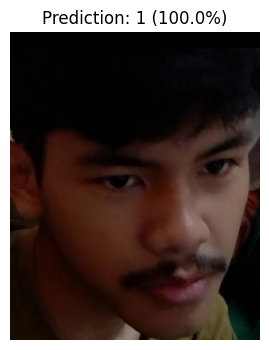

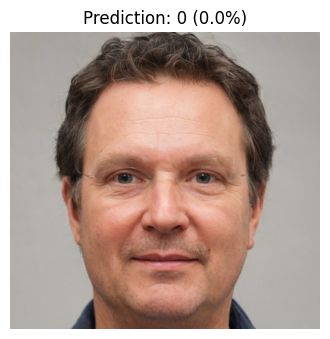

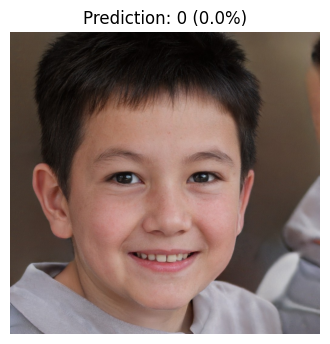

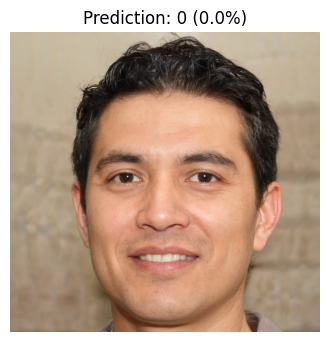

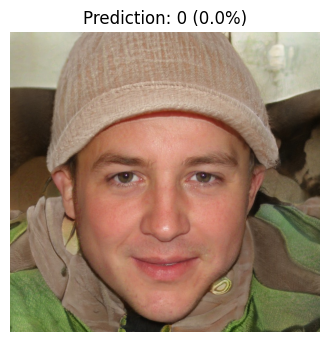

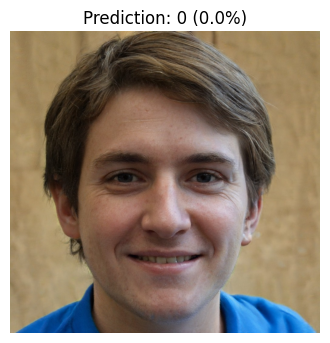

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Path folder gambar
folder_path = r"A:\Kuliah\Skrpsi\Program\Test"

# Ambil daftar file gambar
file_list = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Simpan hasil prediksi
predictions = []

# Threshold untuk klasifikasi biner
threshold = 0.5  # Ubah sesuai kebutuhan

for file_name in file_list:
    img_path = os.path.join(folder_path, file_name)
    
    # Baca gambar dalam grayscale untuk preprocessing
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        # Preprocessing untuk prediksi
        image_resized = cv2.resize(image, (64, 64))  # Resize ke ukuran input model
        image_resized = image_resized / 255.0  # Normalisasi
        image_resized = np.expand_dims(image_resized, axis=-1)  # Tambahkan channel grayscale
        image_resized = np.expand_dims(image_resized, axis=0)  # Tambahkan batch dimensi

        # Lakukan prediksi
        pred = model.predict(image_resized)[0][0]  # Ambil hasil sigmoid (nilai antara 0 dan 1)
        
        # Tentukan kelas berdasarkan threshold
        predicted_label = 1 if pred > threshold else 0
        confidence_score = round(pred * 100, 2)  # Ubah ke persen (%)

        # Simpan hasil prediksi
        predictions.append({
            "Path Gambar": img_path,
            "Prediksi": predicted_label,
            "Akurasi": confidence_score
        })

    else:
        print(f"Gagal membaca: {file_name}")

# Konversi hasil prediksi ke DataFrame
df = pd.DataFrame(predictions)

# Simpan ke CSV jika diperlukan
df.to_csv("Data_Test_wajah_asli_teman-teman.csv", index=False)

# **Tampilkan hasil dalam bentuk tabel**
print(df)

# **Tampilkan gambar satu per satu**
for row in df.itertuples():
    image_path = row._1  # Path Gambar
    predicted_label = row.Prediksi
    confidence_score = row.Akurasi

    # Baca gambar asli dalam warna (RGB) tanpa preprocessing
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB agar warnanya benar

    if img is not None:
        plt.figure(figsize=(4, 4))  # Atur ukuran gambar
        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label} ({confidence_score}%)")
        plt.axis("off")
        plt.show()  # Tampilkan satu gambar lalu tunggu sebelum lanjut
